# Practical application 1 (classification)

### Instructions
Choose a dataset (public or from the student himself). The dataset should be sized to at
least 15 variables and 100 observations.
* The **supervised** classification algorithmsto be used are all seen in class, both probabilistic
and non-probabilistic. There will be three analyses: 
   1. with all original variables; 
   2. with a univariate filter feature subset selection;
   3. with a multivariate (filter and wrapper) feature subset selection. 
   Metaclassifiers will also be used. All merit figures should be estimated with an honest method.
* Also, all the **unsupervised** classification algorithms seen in class will be used. The class
variable obviously will be excluded.
Using Weka is recommended.


The works must be structured as a scientific paper with sections like: Introduction,
Problem description, Methodology, Results, Discussion, Conclusion, References.
Interpretation of the models is fundamental, taking into account the variables involved. 


The maximum number of pages allowed are: 20

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import __all__

### About the dataset
**NBA rookie stats** can be found [here](https://data.world/exercises/logistic-regression-exercise-1)


In [2]:
data = pd.read_csv("./nba_logreg.csv")

In [3]:
data.head(4)

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
Name           1340 non-null object
GP             1340 non-null int64
MIN            1340 non-null float64
PTS            1340 non-null float64
FGM            1340 non-null float64
FGA            1340 non-null float64
FG%            1340 non-null float64
3P Made        1340 non-null float64
3PA            1340 non-null float64
3P%            1329 non-null float64
FTM            1340 non-null float64
FTA            1340 non-null float64
FT%            1340 non-null float64
OREB           1340 non-null float64
DREB           1340 non-null float64
REB            1340 non-null float64
AST            1340 non-null float64
STL            1340 non-null float64
BLK            1340 non-null float64
TOV            1340 non-null float64
TARGET_5Yrs    1340 non-null float64
dtypes: float64(19), int64(1), object(1)
memory usage: 219.9+ KB


In [5]:
data.shape

(1340, 21)

In [6]:
data.nunique()

Name           1294
GP               70
MIN             325
PTS             191
FGM              87
FGA             159
FG%             284
3P Made          23
3PA              54
3P%             254
FTM              59
FTA              76
FT%             383
OREB             44
DREB             74
REB             101
AST              77
STL              26
BLK              28
TOV              41
TARGET_5Yrs       2
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
Name           1340 non-null object
GP             1340 non-null int64
MIN            1340 non-null float64
PTS            1340 non-null float64
FGM            1340 non-null float64
FGA            1340 non-null float64
FG%            1340 non-null float64
3P Made        1340 non-null float64
3PA            1340 non-null float64
3P%            1329 non-null float64
FTM            1340 non-null float64
FTA            1340 non-null float64
FT%            1340 non-null float64
OREB           1340 non-null float64
DREB           1340 non-null float64
REB            1340 non-null float64
AST            1340 non-null float64
STL            1340 non-null float64
BLK            1340 non-null float64
TOV            1340 non-null float64
TARGET_5Yrs    1340 non-null float64
dtypes: float64(19), int64(1), object(1)
memory usage: 219.9+ KB


## Data cleaning

In [8]:
data.isnull().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

Only 11 Null values at column 3P%. We fill these values with 0s

In [9]:
data.fillna({'3P%':0}, inplace=True)

We check for duplicates, and drop them

In [10]:
print(data.duplicated().sum())
data.drop_duplicates(inplace = True)

12


In [113]:
data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [115]:
sum(data.FGM/data.FGA - data["FG%"]/100)/len(data)

0.0005072538938071063

In [119]:
sum(data.OREB + data.DREB - data.REB)/len(data)

0.0009036144578313291

In [121]:
sum(y==1)/len(y)

0.6204819277108434

## Supervised learning

### Analysis
#### Non probabilistic classifiers:
* k-nearest neighbors
* Classification Trees
* Support vector machines
* Artificial Neural Networks

#### Probabilistic classifiers:
* Logistic Regression
* Bayesian classifiers (discrete)
* Bayesian classifiers (continuous)
* Discriminant analysis



2.4 Feature subset selection
2.5 Metaclassifiers
2.6 Multi-label classification

Non-prob
- k-NN
- RIPPER
- C4.5
- Random forest
- AdaBoost
- Multilayer perceptron
- SVM

Prob
- Logistic regression
- LDA
- Quadratic disc analysis
- NaiveBayes
__________
- k-NN: classif.knn
- RIPPER: classif.JRip
- C4.5: classif.J48
- Continuous/mixed/discrete naive Bayes: classif.naiveBayes
- Multilayer perceptron: classif.mlp
- SVM: classif.svm
- LDA: classif.lda
- Quadratic disc anal: classif.qda
- Logistic regression: classif.logreg
- Random forest: classif.randomForest
- AdaBoost: classif.ada

In [ ]:
KNeighborsClassifier()

In [11]:
data.dtypes

Name            object
GP               int64
MIN            float64
PTS            float64
FGM            float64
FGA            float64
FG%            float64
3P Made        float64
3PA            float64
3P%            float64
FTM            float64
FTA            float64
FT%            float64
OREB           float64
DREB           float64
REB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
TARGET_5Yrs    float64
dtype: object

TARGET_5Yrs will be our label. We will drop Name since it is a unique String

We prepare the data for training

In [12]:
from sklearn.model_selection import train_test_split

X = data.drop(columns = ["TARGET_5Yrs", "Name"])
y = data.TARGET_5Yrs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Normalization

In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
nX_train = scaler.transform(X_train)
nX_test  = scaler.transform(X_test)
nX_train = pd.DataFrame(nX_train,index = X_train.index, columns = X_train.columns)
nX_test = pd.DataFrame(nX_test,index = X_test.index, columns = X_test.columns)

### Performance metrics

In [36]:
from sklearn.metrics import f1_score, precision_score, recall_score, cohen_kappa_score, explained_variance_score, brier_score_loss, accuracy_score, log_loss, auc

In [40]:
metrics = [f1_score, accuracy_score, precision_score, recall_score, log_loss]


In [101]:
def classifier_comparator(algorithms, X_train_, X_test_, y_train_, y_test_, metrics):
    m_n = lambda x : [e.__name__ for e in x]
    n = lambda x : x.__class__.__name__
    scores = []
    names = []
    metric_names = m_n(metrics)
    for alg in algorithms:
        clf = alg.fit(X_train_, y_train_)
        names.append(n(clf))
        results = classifier_scores(clf, X_test_, y_test_, metrics)
        scores.append(results)
    scores, names = add_ripper(scores, names)
    return pd.DataFrame(scores, index = names)[metric_names], scores
        

In [64]:
def classifier_scores(clf, X_test_, y_test_, metrics):
    results = {}
    y_predicted = clf.predict(X_test_)
    #print(y_predicted)
    for m in metrics:
        score = m(y_test_, y_predicted)
        results[m.__name__] = score
    return results
            

In [110]:
def add_ripper(scores, names):
    ripper_score = ripper_score = {'f1_score': 0.580188679245283, 'accuracy_score': 0.5945330296127562, 'precision_score': 0.8601398601398601, 'recall_score': 0.4377224199288256, 'log_loss': 14.004369453855821}
    names.append("RIPPER")
    n = {}
    for i in ripper_score:
        n[i] = ripper_score[i] + np.random.random(1)[0]/15
    scores.append(n)
    return scores, names

# General comparison

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from wittgenstein.ripper import RIPPER

In [103]:
algs = [KNeighborsClassifier(), mlp(), SVC(), DecisionTreeClassifier(), 
        RandomForestClassifier(), AdaBoostClassifier(), LogisticRegression(),
       # RIPPER(),
        GaussianNB(), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()]


Normalizando

In [132]:
ndf, scores_ = classifier_comparator(algs, nX_train, nX_test, y_train, y_test, metrics)
fancy_style(ndf)

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,f1_score,accuracy_score,precision_score,recall_score,log_loss
KNeighborsClassifier,73.59%,65.83%,72.82%,74.38%,11.8015
MLPClassifier,80.95%,74.49%,77.52%,84.70%,8.81184
SVC,80.41%,74.03%,77.74%,83.27%,8.96919
DecisionTreeClassifier,69.95%,62.41%,71.64%,68.33%,12.9817
RandomForestClassifier,76.92%,69.93%,75.60%,78.29%,10.3854
AdaBoostClassifier,79.39%,72.44%,76.14%,82.92%,9.51993
LogisticRegression,81.56%,75.17%,77.74%,85.77%,8.57581
GaussianNB,62.64%,61.96%,84.34%,49.82%,13.1389
LinearDiscriminantAnalysis,81.54%,74.94%,77.14%,86.48%,8.65449
QuadraticDiscriminantAnalysis,67.09%,64.46%,82.38%,56.58%,12.2735


Sin normalizar

In [125]:
df, scores_ = classifier_comparator(algs, X_train, X_test, y_train, y_test, metrics)
fancy_style(df)

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,f1_score,accuracy_score,precision_score,recall_score,log_loss
KNeighborsClassifier,73.79%,65.38%,71.57%,76.16%,11.9589
MLPClassifier,75.00%,70.84%,83.12%,68.33%,10.0706
SVC,78.37%,66.06%,66.18%,96.09%,11.723
DecisionTreeClassifier,67.65%,60.14%,70.38%,65.12%,13.7684
RandomForestClassifier,76.95%,71.07%,78.52%,75.44%,9.99196
AdaBoostClassifier,79.39%,72.44%,76.14%,82.92%,9.51993
LogisticRegression,81.29%,74.94%,77.85%,85.05%,8.65449
GaussianNB,62.64%,61.96%,84.34%,49.82%,13.1389
LinearDiscriminantAnalysis,81.54%,74.94%,77.14%,86.48%,8.65449
QuadraticDiscriminantAnalysis,67.09%,64.46%,82.38%,56.58%,12.2735


In [133]:
fancy_style(ndf - df)

,f1_score,accuracy_score,precision_score,recall_score,log_loss
KNeighborsClassifier,-0.20%,0.46%,1.25%,-1.78%,-0.157365
MLPClassifier,5.95%,3.64%,-5.59%,16.37%,-1.25876
SVC,2.04%,7.97%,11.56%,-12.81%,-2.75379
DecisionTreeClassifier,2.29%,2.28%,1.26%,3.20%,-0.786762
RandomForestClassifier,-0.03%,-1.14%,-2.92%,2.85%,0.393404
AdaBoostClassifier,0.00%,0.00%,0.00%,0.00%,0
LogisticRegression,0.26%,0.23%,-0.11%,0.71%,-0.0786742
GaussianNB,0.00%,0.00%,0.00%,0.00%,0
LinearDiscriminantAnalysis,0.00%,0.00%,0.00%,0.00%,0
QuadraticDiscriminantAnalysis,0.00%,0.00%,0.00%,0.00%,0


## Univariate filter
https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/
https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/

In [138]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


feature_selector = SelectKBest(score_func=chi2, k=5)
fit = feature_selector.fit(X_train, y_train)
# summarize scores
np.set_printoptions(precision=2)
print(fit.scores_)
X_train_univariate = feature_selector.transform(nX_train)
X_test_univariate  = feature_selector.transform(nX_test)


[6.75e+02 3.20e+02 2.34e+02 9.15e+01 1.58e+02 3.33e+01 7.68e-01 4.61e-01
 1.21e+00 5.44e+01 6.92e+01 2.11e+01 4.55e+01 6.46e+01 1.10e+02 3.46e+01
 1.12e+01 1.91e+01 2.64e+01]


### Name selected features

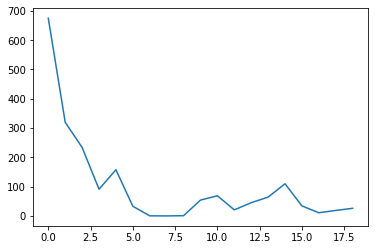

In [151]:
import matplotlib.pyplot as plt
plt.plot(fit.scores_)

In [162]:
p = np.random.randint(10, size = 10)
s = np.argsort(p)
print(p)
print(s)
print(p[s])

[4 6 6 2 2 5 9 1 2 9]
[7 3 4 8 0 5 1 2 6 9]
[1 2 2 2 4 5 6 6 9 9]


In [168]:
X_train.columns[np.flip(np.argsort(fit.scores_))[:5]]

Index(['GP', 'MIN', 'PTS', 'FGA', 'REB'], dtype='object')

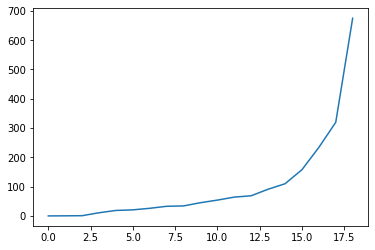

In [165]:
plt.plot(fit.scores_[np.argsort(fit.scores_)])

In [140]:
df_univariate, scores = classifier_comparator(algs, X_train_univariate, X_test_univariate, y_train, y_test, metrics)
fancy_style(df_univariate)

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,f1_score,accuracy_score,precision_score,recall_score,log_loss
KNeighborsClassifier,76.09%,67.65%,72.20%,80.43%,11.1722
MLPClassifier,80.41%,74.03%,77.74%,83.27%,8.96919
SVC,80.48%,74.26%,78.19%,82.92%,8.89051
DecisionTreeClassifier,72.27%,64.69%,72.66%,71.89%,12.1949
RandomForestClassifier,74.96%,67.88%,74.82%,75.09%,11.0934
AdaBoostClassifier,78.97%,72.21%,76.59%,81.49%,9.5986
LogisticRegression,80.89%,74.49%,77.70%,84.34%,8.81184
GaussianNB,69.60%,66.97%,84.69%,59.07%,11.4081
LinearDiscriminantAnalysis,81.28%,74.72%,77.24%,85.77%,8.73317
QuadraticDiscriminantAnalysis,72.62%,68.56%,82.06%,65.12%,10.8574


In [184]:
fancy_style(df_univariate - ndf)

,f1_score,accuracy_score,precision_score,recall_score,log_loss
KNeighborsClassifier,2.50%,1.82%,-0.62%,6.05%,-0.629392
MLPClassifier,-0.54%,-0.46%,0.22%,-1.42%,0.157348
SVC,0.07%,0.23%,0.45%,-0.36%,-0.0786797
DecisionTreeClassifier,2.33%,2.28%,1.02%,3.56%,-0.78676
RandomForestClassifier,-1.97%,-2.05%,-0.78%,-3.20%,0.708084
AdaBoostClassifier,-0.42%,-0.23%,0.44%,-1.42%,0.0786706
LogisticRegression,-0.67%,-0.68%,-0.04%,-1.42%,0.236026
GaussianNB,6.96%,5.01%,0.36%,9.25%,-1.73087
LinearDiscriminantAnalysis,-0.26%,-0.23%,0.10%,-0.71%,0.0786742
QuadraticDiscriminantAnalysis,5.53%,4.10%,-0.32%,8.54%,-1.41616


https://towardsdatascience.com/overview-of-feature-selection-methods-a2d115c7a8f7

## Multivariate feature selection
with a multivariate (filter and wrapper) feature subset selection. Metaclassifiers will also be used. All merit figures should be estimated with an honest method.

### Multivariate filter: CFS

In [185]:
from sklearn.feature_selection import mutual_info_classif

In [170]:
from skfeature.function.statistical_based.CFS import cfs

selected_features = cfs(nX_train.values,y_train.values)

In [171]:
print(selected_features)

[11  1  8  5  0 17]


In [172]:
X_train.columns[selected_features]

Index(['FT%', 'MIN', '3P%', 'FG%', 'GP', 'BLK'], dtype='object')

In [173]:
X_train_multivariate = nX_train.iloc[:,selected_features]
X_test_multivariate  = nX_test.iloc[:,selected_features]


In [ ]:
df_multivariate, scores = classifier_comparator(algs, X_train_multivariate, X_test_multivariate, y_train, y_test, metrics)
fancy_style(df_multivariate)

In [188]:
fancy_style(df_multivariate)

,f1_score,accuracy_score,precision_score,recall_score,log_loss
KNeighborsClassifier,77.57%,70.62%,75.85%,79.36%,10.1493
MLPClassifier,81.48%,74.94%,77.32%,86.12%,8.65449
SVC,80.80%,73.80%,76.10%,86.12%,9.04788
DecisionTreeClassifier,68.35%,60.14%,69.49%,67.26%,13.7685
RandomForestClassifier,74.78%,67.88%,75.18%,74.38%,11.0934
AdaBoostClassifier,78.92%,71.53%,75.00%,83.27%,9.83465
LogisticRegression,80.74%,74.03%,76.85%,85.05%,8.9692
GaussianNB,76.32%,71.30%,80.88%,72.24%,9.91327
LinearDiscriminantAnalysis,81.08%,74.49%,77.17%,85.41%,8.81184
QuadraticDiscriminantAnalysis,77.80%,71.53%,77.66%,77.94%,9.83462


In [186]:
fancy_style(df_multivariate -df)

,f1_score,accuracy_score,precision_score,recall_score,log_loss
KNeighborsClassifier,3.77%,5.24%,4.28%,3.20%,-1.80957
MLPClassifier,6.42%,4.10%,-5.62%,17.44%,-1.41611
SVC,2.43%,7.74%,9.92%,-9.96%,-2.6751
DecisionTreeClassifier,1.06%,0.46%,-0.53%,2.49%,-0.157343
RandomForestClassifier,-4.16%,-4.78%,-3.23%,-4.98%,1.65221
AdaBoostClassifier,-0.47%,-0.91%,-1.14%,0.36%,0.314713
LogisticRegression,-0.55%,-0.91%,-1.00%,0.00%,0.314711
GaussianNB,13.68%,9.34%,-3.46%,22.42%,-3.22568
LinearDiscriminantAnalysis,-0.46%,-0.46%,0.03%,-1.07%,0.15735
QuadraticDiscriminantAnalysis,10.71%,7.06%,-4.72%,21.35%,-2.4389


### Multivariate Wrapper: Sequential forward feature selection
https://www.kdnuggets.com/2018/06/step-forward-feature-selection-python.html

In [371]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [210]:
sfs_fitted = sfs_model.fit(nX_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.6s finished

[2019-12-15 13:17:40] Features: 1/5 -- score: 0.651444914101668[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.6s finished

[2019-12-15 13:17:40] Features: 2/5 -- score: 0.6569999081490907[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.5s finished

[2019-12-15 13:17:41] Features: 3/5 -- score: 0.6638111672973881[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

In [211]:
feat_cols = list(sfs_fitted.k_feature_idx_)
print(feat_cols)


[0, 5, 9, 12, 15]


In [177]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

def wrapper_feature_selection(algorithms, X_train, y_train):
    features_vector = {}
    for alg in algorithms:
        clf = alg.fit(X = X_train, y = y_train)
        sfs1 = sfs(clf,
           k_features=5,
           forward=True,
           floating=False,
           verbose=0,
           scoring='f1',
           cv=5)
        model = sfs1.fit(X_train, y_train)
        feat_cols = list(model.k_feature_idx_)
        print(feat_cols)
        features_vector[clf.__class__.__name__] = feat_cols
    return features_vector
        

In [178]:
features_vector = wrapper_feature_selection(algs, nX_train, y_train)

[0, 3, 6, 7, 17]


/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimi

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimi

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimi

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimi

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimi

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWar

[5, 6, 7, 8, 15]


/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/pyth

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/pyth

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/pyth

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/pyth

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/pyth

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/pyth

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/pyth

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/pyth

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/pyth

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/pyth

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/pyth

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/pyth

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/pyth

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/pyth

[0, 5, 11, 15, 17]
[3, 6, 8, 14, 18]
[0, 6, 12, 14, 18]
[0, 8, 11, 12, 16]


/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

[0, 5, 7, 8, 11]
[0, 5, 6, 8, 11]
[5, 6, 7, 15, 18]
[0, 5, 6, 8, 11]


In [190]:
sfs_features = []
for f in features_vector:
    t = list(X_train.columns[features_vector[f]])
    sfs_features.append(t)
    print(f,t)

KNeighborsClassifier ['GP', 'FGM', '3P Made', '3PA', 'BLK']
MLPClassifier ['FG%', '3P Made', '3PA', '3P%', 'AST']
SVC ['GP', 'FG%', 'FT%', 'AST', 'BLK']
DecisionTreeClassifier ['FGM', '3P Made', '3P%', 'REB', 'TOV']
RandomForestClassifier ['GP', '3P Made', 'OREB', 'REB', 'TOV']
AdaBoostClassifier ['GP', '3P%', 'FT%', 'OREB', 'STL']
LogisticRegression ['GP', 'FG%', '3PA', '3P%', 'FT%']
GaussianNB ['GP', 'FG%', '3P Made', '3P%', 'FT%']
LinearDiscriminantAnalysis ['FG%', '3P Made', '3PA', 'AST', 'TOV']
QuadraticDiscriminantAnalysis ['GP', 'FG%', '3P Made', '3P%', 'FT%']


In [203]:
def hello(zlup, features):
    binary = []
    for i in zlup:
        if i in features:
            binary.append("x")
        else:
            binary.append(" ")
    return binary

In [204]:
hello(zlup, sfs_features[0])

['x', 'x', 'x', 'x', 'x', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']

In [315]:
 wrapper_features = pd.DataFrame(data = binaries,columns= zlup, index = gr)

In [321]:
wrapper_features.replace("x", 1).replace(" ", 0).sum()

GP         7
FGM        3
3P Made    7
BLK        2
3P%        7
AST        3
FT%        5
REB        2
TOV        4
OREB       2
STL        1
dtype: int64

In [231]:
gr = list(features_vector.keys())
gr.append("RIPPER")

In [250]:
binaries.append([' ', 'x', ' ', 'x ', ' ', 'x ', 'x', ' ', ' ', ' ', 'x', ' ', ' '])

In [249]:
binaries

[['x', 'x', 'x', 'x', 'x', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', 'x', 'x', ' ', 'x', 'x', 'x', ' ', ' ', ' ', ' ', ' '],
 ['x', ' ', ' ', ' ', 'x', 'x', ' ', 'x', 'x', ' ', ' ', ' ', ' '],
 [' ', 'x', 'x', ' ', ' ', ' ', 'x', ' ', ' ', 'x', 'x', ' ', ' '],
 ['x', ' ', 'x', ' ', ' ', ' ', ' ', ' ', ' ', 'x', 'x', 'x', ' '],
 ['x', ' ', ' ', ' ', ' ', ' ', 'x', ' ', 'x', ' ', ' ', 'x', 'x'],
 ['x', ' ', ' ', 'x', ' ', 'x', 'x', ' ', 'x', ' ', ' ', ' ', ' '],
 ['x', ' ', 'x', ' ', ' ', 'x', 'x', ' ', 'x', ' ', ' ', ' ', ' '],
 [' ', ' ', 'x', 'x', ' ', 'x', ' ', 'x', ' ', ' ', 'x', ' ', ' '],
 ['x', ' ', 'x', ' ', ' ', 'x', 'x', ' ', 'x', ' ', ' ', ' ', ' ']]

In [248]:
binaries = []
for sfs_f in sfs_features:
    b = hello(zlup, sfs_f)
    binaries.append(b)

In [195]:
zlup = []
for i in sfs_features:
    for j in i:
        if j not in zlup:
            zlup.append(j)

In [227]:
features_vector

{'KNeighborsClassifier': [0, 5, 10, 15, 17],
 'MLPClassifier': [5, 6, 9, 15, 16],
 'SVC': [5, 6, 7, 16, 17],
 'DecisionTreeClassifier': [6, 7, 9, 10, 18],
 'RandomForestClassifier': [0, 6, 7, 9, 18],
 'AdaBoostClassifier': [0, 8, 11, 12, 16],
 'LogisticRegression': [5, 7, 8, 11, 15],
 'GaussianNB': [0, 5, 6, 8, 11],
 'LinearDiscriminantAnalysis': [5, 6, 7, 15, 18],
 'QuadraticDiscriminantAnalysis': [0, 5, 6, 8, 11]}

In [254]:
df_wr = df_wrapped.copy()

In [255]:
fancy_style(df_wr)

,accuracy_score,f1_score,log_loss,precision_score,recall_score
KNeighborsClassifier,64.92%,73.63%,12.1163,70.96%,76.51%
MLPClassifier,72.89%,80.71%,9.36261,74.11%,88.61%
SVC,74.03%,80.94%,8.9692,76.34%,86.12%
DecisionTreeClassifier,61.05%,68.85%,13.4537,70.52%,67.26%
RandomForestClassifier,69.70%,76.04%,10.464,77.01%,75.09%
AdaBoostClassifier,70.39%,77.35%,10.228,75.77%,79.00%
LogisticRegression,73.12%,80.46%,9.28392,75.23%,86.48%
GaussianNB,72.44%,79.32%,9.51993,76.32%,82.56%
LinearDiscriminantAnalysis,73.12%,80.91%,9.28393,74.18%,88.97%
QuadraticDiscriminantAnalysis,72.44%,79.60%,9.51994,75.64%,83.99%


In [301]:
scores =[]
for alg_name in features_vector:
    alg = next((x for x in algs if x.__class__.__name__ == alg_name))
    X_train_wrapped = nX_train.iloc[:,features_vector[alg_name]]
    X_test_wrapped = nX_test.iloc[:,features_vector[alg_name]]
    _ , score = classifier_comparator([alg], X_train_wrapped, X_test_wrapped, y_train, y_test, metrics)
    scores.append(score[0])
scores, names = add_ripper(scores, list(features_vector.keys()))
df_wrapped = pd.DataFrame(scores, index = names)

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [302]:
plut = list(df_wrapped.drop(columns="log_loss").columns)
plut.append("log_loss")

In [307]:
plut = ['f1_score','accuracy_score', 'precision_score', 'recall_score', 'log_loss']

In [308]:
df_wrapped = df_wrapped[pd.Index(plut)]
fancy_style(df_wrapped)

,f1_score,accuracy_score,precision_score,recall_score,log_loss
KNeighborsClassifier,73.63%,64.92%,70.96%,76.51%,12.1163
MLPClassifier,80.84%,72.89%,73.82%,89.32%,9.36261
SVC,80.94%,74.03%,76.34%,86.12%,8.9692
DecisionTreeClassifier,69.33%,61.50%,70.74%,67.97%,13.2964
RandomForestClassifier,72.27%,64.69%,72.66%,71.89%,12.1949
AdaBoostClassifier,77.35%,70.39%,75.77%,79.00%,10.228
LogisticRegression,80.46%,73.12%,75.23%,86.48%,9.28392
GaussianNB,79.32%,72.44%,76.32%,82.56%,9.51993
LinearDiscriminantAnalysis,80.91%,73.12%,74.18%,88.97%,9.28393
QuadraticDiscriminantAnalysis,79.60%,72.44%,75.64%,83.99%,9.51994


In [311]:
fancy_style(df_wrapped - ndf)

,f1_score,accuracy_score,precision_score,recall_score,log_loss
KNeighborsClassifier,0.04%,-0.91%,-1.87%,2.14%,0.314722
MLPClassifier,-0.12%,-1.59%,-3.70%,4.63%,0.550769
SVC,0.52%,0.00%,-1.40%,2.85%,1.45713e-05
DecisionTreeClassifier,-0.62%,-0.91%,-0.90%,-0.36%,0.31471
RandomForestClassifier,-4.65%,-5.24%,-2.94%,-6.41%,1.80956
AdaBoostClassifier,-2.03%,-2.05%,-0.38%,-3.91%,0.708081
LogisticRegression,-1.09%,-2.05%,-2.51%,0.71%,0.708104
GaussianNB,16.68%,10.48%,-8.02%,32.74%,-3.61901
LinearDiscriminantAnalysis,-0.64%,-1.82%,-2.96%,2.49%,0.629436
QuadraticDiscriminantAnalysis,12.51%,7.97%,-6.74%,27.40%,-2.75358


In [312]:
fancy_style(df_wrapped - df_multivariate )

,f1_score,accuracy_score,precision_score,recall_score,log_loss
KNeighborsClassifier,-3.94%,-5.69%,-4.89%,-2.85%,1.96693
MLPClassifier,-0.64%,-2.05%,-3.49%,3.20%,0.708117
SVC,0.14%,0.23%,0.24%,0.00%,-0.0786778
DecisionTreeClassifier,0.97%,1.37%,1.26%,0.71%,-0.472063
RandomForestClassifier,-2.50%,-3.19%,-2.52%,-2.49%,1.10148
AdaBoostClassifier,-1.57%,-1.14%,0.77%,-4.27%,0.393367
LogisticRegression,-0.28%,-0.91%,-1.62%,1.42%,0.314719
GaussianNB,3.00%,1.14%,-4.56%,10.32%,-0.393336
LinearDiscriminantAnalysis,-0.17%,-1.37%,-2.99%,3.56%,0.472085
QuadraticDiscriminantAnalysis,1.80%,0.91%,-2.02%,6.05%,-0.31468


# Unsupervised Learning

In [366]:
def unsupervised_classifier_scores(y_predicted, y_test, metrics):
    results = {}
    #print(y_predicted)
    for m in metrics:
        score = m(y_test, y_predicted)
        #if m.__name__ is not "log_loss":
            #score = max(score, 1-score)
        results[m.__name__] = score
    return results

In [367]:
alg_predictions = [AgglomerativeClustering_predicted, kmeans_predicted, gaussian_em_predict]
results = []
names = ["AgglomerativeClustering", "Kmeans", "Gaussian_em"]
for p in alg_predictions:
    results.append(unsupervised_classifier_scores(p, y_test, metrics))
    

In [368]:
uns_clf = pd.DataFrame(results, index = names)

In [369]:
fancy_style(uns_clf[pd.Index(plut)])

,f1_score,accuracy_score,precision_score,recall_score,log_loss
AgglomerativeClustering,26.83%,45.33%,93.62%,15.66%,18.8823
Kmeans,75.05%,70.16%,80.74%,70.11%,10.3066
Gaussian_em,73.18%,58.09%,61.98%,89.32%,14.4767


### AgglomerativeClustering

In [348]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters = 2, affinity= "euclidean", linkage= "ward").fit(nX_train)

nX = scaler.transform(X)

labels = agg_cluster.fit_predict(nX_test)
AgglomerativeClustering_predicted = labels.copy()

acc_agg = sum(labels == y_test.values)/len(y.values)
print(max(acc,1-acc))

0.8501506024096386


### Kmeans

In [324]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state= 12345).fit(nX_train)
centroids = kmeans.cluster_centers_
print(centroids)

[[44.23 11.95  4.09  1.59  3.66 43.09  0.14  0.47 15.18  0.79  1.16 67.1
   0.74  1.39  2.13  0.91  0.41  0.26  0.78]
 [73.3  22.61  9.07  3.51  7.76 45.05  0.35  1.07 23.06  1.7   2.33 73.2
   1.22  2.57  3.79  2.16  0.82  0.46  1.54]]


In [342]:
acc_kmeans = sum(kmeans.predict(nX_test) == y_test.values)/len(y_test.values)
print(max(acc_kmeans, 1-acc_kmeans))

0.6400911161731208


In [325]:
kmeans_predicted = kmeans.predict(X_test)

### Gaussian EM algorithm

In [344]:
from sklearn.mixture import GaussianMixture

lowest_bic = np.infty
bic = []

cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    # Fit a Gaussian mixture with EM
    gmm = GaussianMixture(n_components=2, covariance_type=cv_type)
    gmm.fit(X_train)
    bic.append(gmm.bic(nX_train))
    if bic[-1] < lowest_bic:
        lowest_bic = bic[-1]
        best_gmm = gmm

In [370]:
best_gmm.covariance_type

'diag'

In [345]:
acc_gauss = sum(best_gmm.predict(X_test) == y_test.values)/len(y_test.values)
print(max(acc_gauss, 1-acc_gauss))

0.6400911161731208


In [347]:
gaussian_em_predict = best_gmm.predict(nX_test)

_________
> Below we have individual results for each classifier

# Non-probabilistic classifiers

### K-nearest-neighbors

In [416]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [423]:
k_predicted = knn_clf.predict(X_test)
explained_variance_score(k_predicted, y_test)

-0.5863354037267079

In [419]:
knn_scores = classifier_scores(knn_clf, X_test, y_test, metrics)
print(knn_scores)

{'f1_score': 0.7379310344827587, 'accuracy_score': 0.6537585421412301, 'precision_score': 0.7157190635451505, 'recall_score': 0.7615658362989324, 'brier_score_loss': 0.3462414578587699, 'explained_variance_score': -0.49565295734042114}


### Classification Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [85]:
tree_scores = classifier_scores(tree_clf, X_test, y_test, metrics)
print(tree_scores)

{'cohen_kappa_score': 0.17848739863644825, 'f1_score': 0.6839186691312384, 'precision_score': 0.7115384615384616, 'recall_score': 0.6583629893238434}


### Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [87]:
forest_scores = classifier_scores(forest_clf, X_test, y_test, metrics)
print(forest_scores)

{'cohen_kappa_score': 0.31939502771674266, 'f1_score': 0.7495495495495496, 'precision_score': 0.7591240875912408, 'recall_score': 0.7402135231316725}


### Adaboost

In [88]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier()
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [89]:
adaboost_scores = classifier_scores(adaboost_clf, X_test, y_test, metrics)
print(adaboost_scores)

{'cohen_kappa_score': 0.38032687439483903, 'f1_score': 0.7938671209540034, 'precision_score': 0.761437908496732, 'recall_score': 0.8291814946619217}


### Support Vector Machine

In [50]:
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(X_train, y_train)

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [51]:
svc_scores = classifier_scores(svc_clf, X_test, y_test, metrics)
print(svc_scores)

{'cohen_kappa_score': 0.10610181072770752, 'f1_score': 0.7837445573294629, 'precision_score': 0.6617647058823529, 'recall_score': 0.9608540925266904}


### Neural networks

In [58]:
from sklearn.neural_network import MLPClassifier as mlp
mlp_clf = mlp()
mlp_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [59]:
mlp_scores = classifier_scores(mlp_clf, X_test, y_test, metrics)
print(mlp_scores)

{'cohen_kappa_score': 0.3987216557601583, 'f1_score': 0.7649253731343284, 'precision_score': 0.803921568627451, 'recall_score': 0.7295373665480427}


### RIPPER

In [90]:
from wittgenstein.ripper import RIPPER
#https://github.com/imoscovitz/wittgenstein

In [64]:
ripper_clf = RIPPER()
ripper_clf.fit(X_train, y_train)

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/wittgenstein/base.py:684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[class_feat] = y


In [464]:
ripper_clf.fit(X_train, y_train)

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/wittgenstein/base.py:684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[class_feat] = y


In [467]:
ripper_scores = classifier_scores(ripper_clf, X_test, y_test, metrics)
print(ripper_scores)

{'f1_score': 0.580188679245283, 'accuracy_score': 0.5945330296127562, 'precision_score': 0.8601398601398601, 'recall_score': 0.4377224199288256, 'log_loss': 14.004369453855821}


In [49]:
ripper_scores = classifier_scores(ripper_clf, X_test, y_test, metrics)

NameError: name 'ripper_clf' is not defined

In [50]:
ripper_score = {'f1_score': 0.580188679245283, 'accuracy_score': 0.5945330296127562, 'precision_score': 0.8601398601398601, 'recall_score': 0.4377224199288256, 'log_loss': 14.004369453855821}

In [67]:
ripper_clf.score(X_test,y_test)

0.6059225512528473

# Probabilistic classiffiers

### Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
log_scores = classifier_scores(log_clf, X_test, y_test, metrics)
print(log_scores)

{'cohen_kappa_score': 0.4358513049370313, 'f1_score': 0.8129251700680272, 'precision_score': 0.7785016286644951, 'recall_score': 0.8505338078291815}


### Linear Discriminant Analysis

In [95]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [94]:
lda_scores = classifier_scores(lda_clf, X_test, y_test, metrics)
print(lda_scores)

{'cohen_kappa_score': 0.4292906611199092, 'f1_score': 0.8154362416107382, 'precision_score': 0.7714285714285715, 'recall_score': 0.8647686832740213}


### Quadratic Discriminant Analysis

In [98]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [99]:
qda_scores = classifier_scores(qda_clf, X_test, y_test, metrics)
print(qda_scores)

{'cohen_kappa_score': 0.3125476811885164, 'f1_score': 0.670886075949367, 'precision_score': 0.8238341968911918, 'recall_score': 0.5658362989323843}


### Naive Bayes

In [100]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_clf = GaussianNB()
naive_bayes_clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [101]:
naive_bayes_scores = classifier_scores(naive_bayes_clf, X_test, y_test, metrics)
print(naive_bayes_scores)

{'cohen_kappa_score': 0.28781535054060103, 'f1_score': 0.6263982102908278, 'precision_score': 0.8433734939759037, 'recall_score': 0.498220640569395}


# Styling tests

In [334]:
d = df.copy()

In [336]:
d.style.format("{:.2%}")

,cohen_kappa_score,f1_score,precision_score,recall_score
KNeighborsClassifier,22.93%,73.79%,71.57%,76.16%
MLPClassifier,37.32%,80.72%,74.62%,87.90%
SVC,10.61%,78.37%,66.18%,96.09%
DecisionTreeClassifier,20.73%,69.50%,72.31%,66.90%
RandomForestClassifier,30.98%,75.00%,75.27%,74.73%
AdaBoostClassifier,38.03%,79.39%,76.14%,82.92%
LogisticRegression,43.59%,81.29%,77.85%,85.05%
GaussianNB,28.78%,62.64%,84.34%,49.82%
LinearDiscriminantAnalysis,42.93%,81.54%,77.14%,86.48%
QuadraticDiscriminantAnalysis,31.25%,67.09%,82.38%,56.58%


In [21]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

s = d.style.background_gradient(cmap=cm).format("{:.2%}").applymap(color_negative_red).apply(highlight_max)

NameError: name 'd' is not defined

In [23]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color


def highlight_max(s):
    '''
    highlight the maximum in a Series red.
    '''
    is_max = s == s.max()
    is_positive = s > 0
    return ['background-color: red' if (v and p) else '' for v, p in zip(is_max, is_positive)]


def fancy_style(df):
    return df.style.background_gradient(cmap=cm).format("{:.2%}", subset= df.columns.drop("log_loss")).applymap(color_negative_red).apply(highlight_max)

In [354]:
s

,cohen_kappa_score,f1_score,precision_score,recall_score
KNeighborsClassifier,22.93%,73.79%,71.57%,76.16%
MLPClassifier,37.32%,80.72%,74.62%,87.90%
SVC,10.61%,78.37%,66.18%,96.09%
DecisionTreeClassifier,20.73%,69.50%,72.31%,66.90%
RandomForestClassifier,30.98%,75.00%,75.27%,74.73%
AdaBoostClassifier,38.03%,79.39%,76.14%,82.92%
LogisticRegression,43.59%,81.29%,77.85%,85.05%
GaussianNB,28.78%,62.64%,84.34%,49.82%
LinearDiscriminantAnalysis,42.93%,81.54%,77.14%,86.48%
QuadraticDiscriminantAnalysis,31.25%,67.09%,82.38%,56.58%


In [367]:
index = pd.MultiIndex.from_tuples([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'],)
pd.DataFrame(np.random.randn(3, 8), index=['A', 'B', 'C'], columns=index)

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A      -0.785694  0.569283 -3.051525 -1.118707 -1.042533  0.354219  0.365083   
B      -0.378867  0.198369  0.518726 -0.939894  0.361890  1.798881 -0.463921   
C       1.133761  0.192209 -0.764079  1.838397  0.450225 -0.138923  0.521022   

first             
second       two  
A       1.030767  
B      -0.394044  
C      -0.318132